In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [16]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
max_date = session.query(func.max(func.strftime("%Y-%m-%d", Measurement.date))).limit(5).all()
max_date[0][0]

'2017-08-23'

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(func.strftime("%Y-%m-%d", Measurement.date), Measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data, columns = ['date', 'precipitation'])
precipitation_df.set_index('date', inplace = True)


# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values(by='date')
precipitation_df.head()




,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


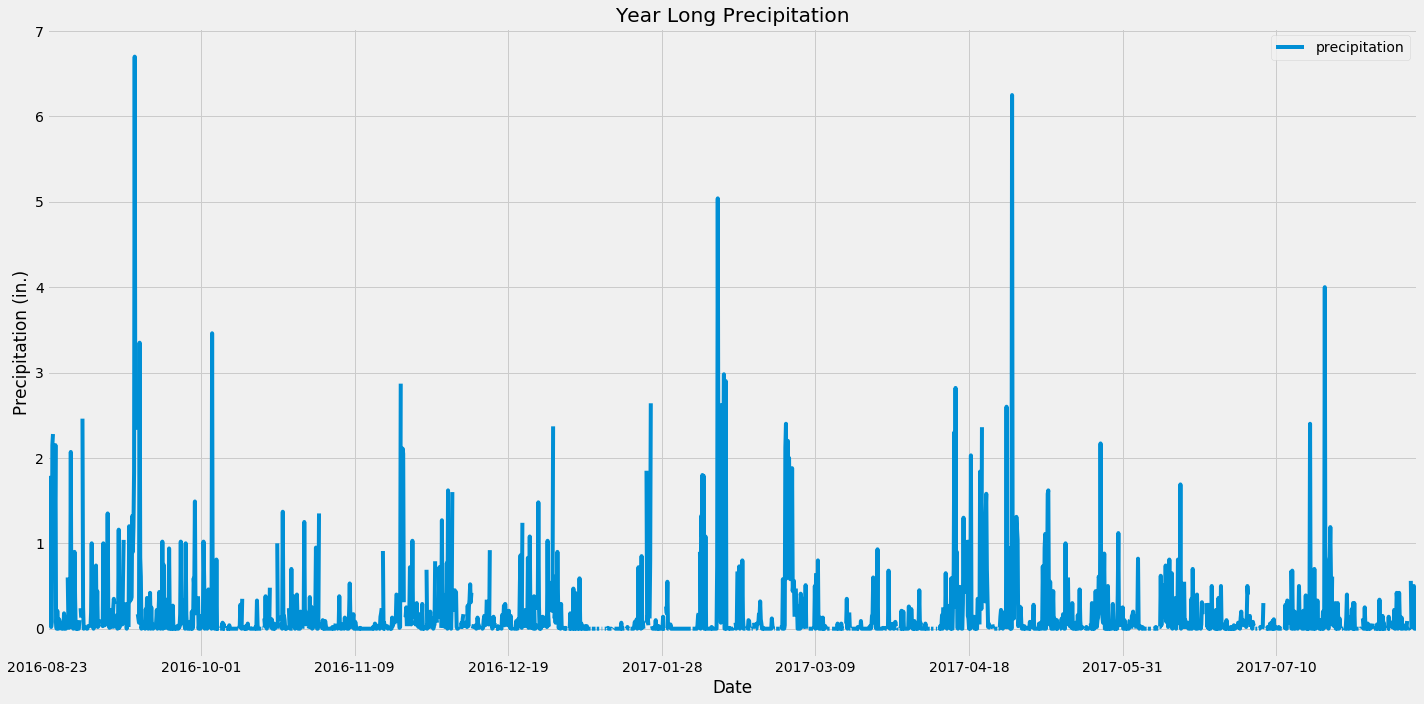

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data

fig, ax = plt.subplots(figsize = (20, 10))
precipitation_df.plot(ax = ax, x_compat = True)
#title and labels
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation (in.)')
ax.set_title("Year Long Precipitation")

plt.savefig("Images/precipitation.png")

#plot
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.id).distinct().count()
stations

9

In [30]:
query3 = """
        SELECT
            s.station,
            s.name,
            count(*) 
        FROM
            station s
        JOIN measurement m 
            on s.station = m.station
        GROUP BY 
            s.station
        ORDER BY
            count(*) desc
        """

In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
conn = engine.connect()
df3=pd.read_sql(query3,conn)


df3.rename(columns = {'count(*)':'Total Number of Observations'}, inplace = True)
df3

,station,name,Total Number of Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [32]:
#What are the most active stations? (i.e. what stations have the most rows)?

mostactive=df3["Total Number of Observations"].max()

mask=df3["Total Number of Observations"]==mostactive
name=df3.loc[mask]
name

,station,name,Total Number of Observations
0,USC00519281,"WAIHEE 837.5, HI US",2772


In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

query_active= """
            SELECT
                station,
                date,
                tobs
            FROM
                measurement
            WHERE
                station='USC00519281'
            ORDER BY
                tobs desc
        """

In [41]:
query_test= """
          SELECT
              station,
              date,
              tobs
          FROM
              measurement
        """

In [43]:
  df_test=pd.read_sql(query_active,conn)
  df_test

,station,date,tobs
0,USC00519281,2015-09-10,85.0
1,USC00519281,2015-09-09,84.0
2,USC00519281,2015-07-18,83.0
3,USC00519281,2015-09-05,83.0
4,USC00519281,2017-08-06,83.0
...,...,...,...
2767,USC00519281,2015-01-05,56.0
2768,USC00519281,2015-02-15,56.0
2769,USC00519281,2015-03-13,56.0
2770,USC00519281,2016-02-08,56.0


In [45]:
df_active=pd.read_sql(query_active,conn)
df_active

,station,date,tobs
0,USC00519281,2015-09-10,85.0
1,USC00519281,2015-09-09,84.0
2,USC00519281,2015-07-18,83.0
3,USC00519281,2015-09-05,83.0
4,USC00519281,2017-08-06,83.0
...,...,...,...
2767,USC00519281,2015-01-05,56.0
2768,USC00519281,2015-02-15,56.0
2769,USC00519281,2015-03-13,56.0
2770,USC00519281,2016-02-08,56.0


In [46]:
highest_temp=df_active.tobs.max()
lowest_temp=df_active.tobs.min()
average_temp=df_active.tobs.mean()

print(f"the lowest temp observation in the most active station is {lowest_temp}, the highest is {highest_temp} and the average temp is {average_temp}" )

the lowest temp observation in the most active station is 54.0, the highest is 85.0 and the average temp is 71.66378066378067


In [47]:
highest_temp=df_active.tobs.max()
lowest_temp=df_active.tobs.min()
average_temp=df_active.tobs.mean()

print(f"the lowest temp observation in the most active station is {lowest_temp}, the highest is {highest_temp} and the average temp is {average_temp}" )

the lowest temp observation in the most active station is 54.0, the highest is 85.0 and the average temp is 71.66378066378067


In [48]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


query4 = """
        SELECT
            s.station,
            s.name,
            m.tobs,
            m.date
        FROM
            station s
        JOIN measurement m 
            on s.station = m.station
        WHERE
            date >= (
                        SELECT
                           date(MAX(date), '-365 day')
                        FROM
                            measurement)
        ORDER BY
            date
        
        """

In [49]:
df4=pd.read_sql(query4,conn)

df4["date"] = pd.to_datetime(df4["date"])


df4

,station,name,tobs,date
0,USC00519397,"WAIKIKI 717.2, HI US",81.0,2016-08-23
1,USC00513117,"KANEOHE 838.1, HI US",76.0,2016-08-23
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",80.0,2016-08-23
3,USC00517948,"PEARL CITY, HI US",80.0,2016-08-23
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",80.0,2016-08-23
...,...,...,...,...
2225,USC00516128,"MANOA LYON ARBO 785.2, HI US",76.0,2017-08-22
2226,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-23
2227,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",82.0,2017-08-23
2228,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",82.0,2017-08-23


In [50]:
most_temp_observations=df4.station.value_counts()
print(most_temp_observations)
station_needed=most_temp_observations.index[0]
print(station_needed)

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64
USC00519397


In [51]:
most_active_df=df4.loc[df4.station==station_needed].reset_index(drop=True)
most_active_df

,station,name,tobs,date
0,USC00519397,"WAIKIKI 717.2, HI US",81.0,2016-08-23
1,USC00519397,"WAIKIKI 717.2, HI US",79.0,2016-08-24
2,USC00519397,"WAIKIKI 717.2, HI US",80.0,2016-08-25
3,USC00519397,"WAIKIKI 717.2, HI US",79.0,2016-08-26
4,USC00519397,"WAIKIKI 717.2, HI US",77.0,2016-08-27
...,...,...,...,...
356,USC00519397,"WAIKIKI 717.2, HI US",79.0,2017-08-19
357,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-20
358,USC00519397,"WAIKIKI 717.2, HI US",81.0,2017-08-21
359,USC00519397,"WAIKIKI 717.2, HI US",82.0,2017-08-22


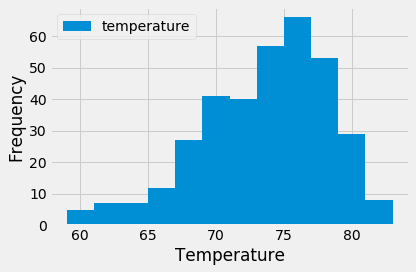

In [28]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_observation = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= dt.date(2016, 8, 23)).all()

#save as a data frame
temp_observation_df = pd.DataFrame(temp_observation, columns = ['date', 'temperature'])

fig, ax = plt.subplots()
temp_observation_df.plot.hist(bins = 12, ax = ax)

#labels
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

#save figure
plt.savefig("Images/yearly_plot.png")

#plot
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()